# **Step 1**

In [23]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the file path
file_path = "/content/drive/My Drive/Colab Notebooks/Agricultural Project/agriculture_regression_dataset.csv"

# Step 3: Load the dataset
import pandas as pd

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
   Soil_Moisture   Rainfall  Temperature   Humidity   pH_Level  \
0      43.708611  33.553512    61.479629  68.343126  74.824113   
1      95.564288  32.228092    82.488910  25.514773  71.855470   
2      75.879455  91.562912    78.414484  88.515511  18.617878   
3      63.879264  32.459158    23.850991  65.180462  93.031516   
4      24.041678  34.475475    23.432452  24.148350  61.162498   

   Nitrogen_Content  Phosphorus_Content  Potassium_Content  Crop_Height  \
0         43.627674           68.887569          16.585759    10.396145   
1         39.962089           17.202931          18.053054    10.029714   
2         25.853852           31.809683                NaN    52.503711   
3         64.654000           79.631141          53.824664    12.636433   
4         52.896174           57.581727          81.137373    97.70793

# **Step 2**

In [24]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Example: Filling missing values
# Replace missing values in numerical columns with the median
data.fillna(data.median(numeric_only=True), inplace=True)

# Replace missing values in categorical columns with the mode
for column in data.select_dtypes(include='object').columns:
  data[column] = data[column].fillna(data[column].mode()[0])
print("Missing values handled!")

print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Soil_Moisture           103
Rainfall                  0
Temperature               0
Humidity                103
pH_Level                  0
Nitrogen_Content          0
Phosphorus_Content        0
Potassium_Content       103
Crop_Height             104
Yield_Per_Hectare         0
Irrigation_Frequency      0
Seed_Rate                 0
Pesticide_Usage           0
Weed_Infestation          0
Harvest_Time              0
Fertilizer_Usage          0
Soil_Type               105
Irrigation_Type           0
Crop_Type                 0
Yield                     0
dtype: int64
Missing values handled!
Missing values per column:
Soil_Moisture           0
Rainfall                0
Temperature             0
Humidity                0
pH_Level                0
Nitrogen_Content        0
Phosphorus_Content      0
Potassium_Content       0
Crop_Height             0
Yield_Per_Hectare       0
Irrigation_Frequency    0
Seed_Rate               0
Pesticide_Usage         0
Weed_Infest

In [25]:
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Remove duplicate rows
data = data.drop_duplicates()

print("Duplicates removed!")

print(f"Number of duplicate rows: {data.duplicated().sum()}")



Number of duplicate rows: 50
Duplicates removed!
Number of duplicate rows: 0


In [26]:
# Identify outliers using IQR
Q1 = data['Fertilizer_Usage'].quantile(0.25)
Q3 = data['Fertilizer_Usage'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
data['Fertilizer_Usage'] = data['Fertilizer_Usage'].clip(lower=lower_bound, upper=upper_bound)

print("Outliers in 'Fertilizer_Usage' column handled!")


Outliers in 'Fertilizer_Usage' column handled!


<ipython-input-26-f023b6092bfb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fertilizer_Usage'] = data['Fertilizer_Usage'].clip(lower=lower_bound, upper=upper_bound)


# **Step 3**

In [27]:
# Step 1: Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(exclude='object').columns

# Print the categorical and numerical columns
print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Categorical columns: Index(['Soil_Type', 'Irrigation_Type', 'Crop_Type'], dtype='object')
Numerical columns: Index(['Soil_Moisture', 'Rainfall', 'Temperature', 'Humidity', 'pH_Level',
       'Nitrogen_Content', 'Phosphorus_Content', 'Potassium_Content',
       'Crop_Height', 'Yield_Per_Hectare', 'Irrigation_Frequency', 'Seed_Rate',
       'Pesticide_Usage', 'Weed_Infestation', 'Harvest_Time',
       'Fertilizer_Usage', 'Yield'],
      dtype='object')
Unique values in 'Soil_Type': ['Sandy' 'Clay' 'Loamy']
Unique values in 'Irrigation_Type': ['Flood' 'Sprinkler' 'Drip']
Unique values in 'Crop_Type': ['Fruit' 'Cereal' 'Vegetable']


In [28]:
# Step 1: Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Step 2: Print the first few rows of the encoded data to verify
print(data_encoded.head())

   Soil_Moisture   Rainfall  Temperature   Humidity   pH_Level  \
0      43.708611  33.553512    61.479629  68.343126  74.824113   
1      95.564288  32.228092    82.488910  25.514773  71.855470   
2      75.879455  91.562912    78.414484  88.515511  18.617878   
3      63.879264  32.459158    23.850991  65.180462  93.031516   
4      24.041678  34.475475    23.432452  24.148350  61.162498   

   Nitrogen_Content  Phosphorus_Content  Potassium_Content  Crop_Height  \
0         43.627674           68.887569          16.585759    10.396145   
1         39.962089           17.202931          18.053054    10.029714   
2         25.853852           31.809683          55.062697    52.503711   
3         64.654000           79.631141          53.824664    12.636433   
4         52.896174           57.581727          81.137373    97.707930   

   Yield_Per_Hectare  ...       Yield  Soil_Type_Clay  Soil_Type_Loamy  \
0          68.112160  ...  308.786495           False            False   
1   

In [29]:
# Step 3: Scale numerical variables using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

print("Numerical columns scaled!")
print(data_encoded.head())  # Display the scaled dataset


Numerical columns scaled!
   Soil_Moisture  Rainfall  Temperature  Humidity  pH_Level  Nitrogen_Content  \
0      -0.436967 -0.813443     0.263005  0.580387  0.810430         -0.452705   
1       1.581710 -0.864488     1.073917 -1.122004  0.693504         -0.592566   
2       0.815404  1.420635     0.916653  1.382222 -1.403375         -1.130871   
3       0.348252 -0.855589    -1.189378  0.454673  1.527568          0.349562   
4      -1.202576 -0.777936    -1.205532 -1.176318  0.272338         -0.099062   

   Phosphorus_Content  Potassium_Content  Crop_Height  Yield_Per_Hectare  ...  \
0            0.546143          -1.501466    -1.825571           0.458668  ...   
1           -1.429058          -1.444014    -1.840283          -0.382567  ...   
2           -0.870840           0.005103    -0.135031          -0.142268  ...   
3            0.956724          -0.043372    -1.735628           0.704305  ...   
4            0.114075           1.026060     1.679834           1.256137  ...   



# **Step 4**

In [30]:
#combining Fertilizer Usage with Soil Moisture could help indicate how the effectiveness of fertilizer might vary depending on soil conditions.

# Creating a new feature by combining Fertilizer Usage and Soil Moisture
data_encoded['Fertilizer_Soil_Moisture_Interaction'] = data_encoded['Fertilizer_Usage'] * data_encoded['Soil_Moisture']

# Display the first few rows of the dataset to see the new feature
print("New Feature Created: Fertilizer_Soil_Moisture_Interaction")
print(data_encoded[['Fertilizer_Usage', 'Soil_Moisture', 'Fertilizer_Soil_Moisture_Interaction']].head())


New Feature Created: Fertilizer_Soil_Moisture_Interaction
   Fertilizer_Usage  Soil_Moisture  Fertilizer_Soil_Moisture_Interaction
0          2.648159      -0.436967                             -1.157157
1          2.648159       1.581710                              4.188619
2          2.648159       0.815404                              2.159320
3          2.648159       0.348252                              0.922226
4          2.648159      -1.202576                             -3.184611


# **Step 5**

In [31]:
# Step 5: Model Implementation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
knn_regressor = KNeighborsRegressor()
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()

# Display the initialized models
print("Models initialized:")
print("1. K-Nearest Neighbors Regressor")
print("2. Decision Tree Regressor")
print("3. Random Forest Regressor")

Models initialized:
1. K-Nearest Neighbors Regressor
2. Decision Tree Regressor
3. Random Forest Regressor


# **Step 6**

In [32]:
# Step 6: Model Training
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = data_encoded.drop(columns=['Yield'])  # Features (excluding the target column)
y = data_encoded['Yield']  # Target variable (Yield)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train each model on the training data
knn_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

# Display a message after training
print("Models trained successfully on the training data!")


Models trained successfully on the training data!


# **Step 7**

In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # List of k values to try for KNN
dt_param_grid = {'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}  # Hyperparameters for Decision Tree
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}  # Hyperparameters for Random Forest

# Initialize GridSearchCV for each model
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, n_jobs=-1)
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), dt_param_grid, cv=5, n_jobs=-1)
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters for each model
knn_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Display the best hyperparameters for each model
print("Best KNN Hyperparameters:", knn_grid_search.best_params_)
print("Best Decision Tree Hyperparameters:", dt_grid_search.best_params_)
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)

# Save the best models
best_knn = knn_grid_search.best_estimator_
best_dt = dt_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

# Train the models with the best hyperparameters
best_knn.fit(X_train, y_train)
best_dt.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

print("Models trained with optimized hyperparameters!")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best KNN Hyperparameters: {'n_neighbors': 11}
Best Decision Tree Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Best Random Forest Hyperparameters: {'max_features': 'sqrt', 'n_estimators': 200}
Models trained with optimized hyperparameters!


# **Step 8**

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions from the tuned models

knn_pred = best_knn.predict(X_test)
dt_pred = best_dt.predict(X_test)
rf_pred = best_rf.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Calculate R² Score (R-squared)
knn_r2 = r2_score(y_test, knn_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print RMSE and R² Score for each model
print(f"KNN - RMSE: {knn_rmse}, R² Score: {knn_r2}")
print(f"Decision Tree - RMSE: {dt_rmse}, R² Score: {dt_r2}")
print(f"Random Forest - RMSE: {rf_rmse}, R² Score: {rf_r2}")

# Identify the best-performing model
best_model = None
best_rmse = min(knn_rmse, dt_rmse, rf_rmse)
best_r2 = max(knn_r2, dt_r2, rf_r2)

if best_rmse == knn_rmse and best_r2 == knn_r2:
    best_model = "KNN"
elif best_rmse == dt_rmse and best_r2 == dt_r2:
    best_model = "Decision Tree"
else:
    best_model = "Random Forest"

print(f"The best-performing model is: {best_model}")


KNN - RMSE: 0.5185290598548076, R² Score: 0.7301388291239763
Decision Tree - RMSE: 0.26492935919820765, R² Score: 0.9295543180977773
Random Forest - RMSE: 0.33594942212269097, R² Score: 0.8867229328793145
The best-performing model is: Decision Tree


**Step 9**

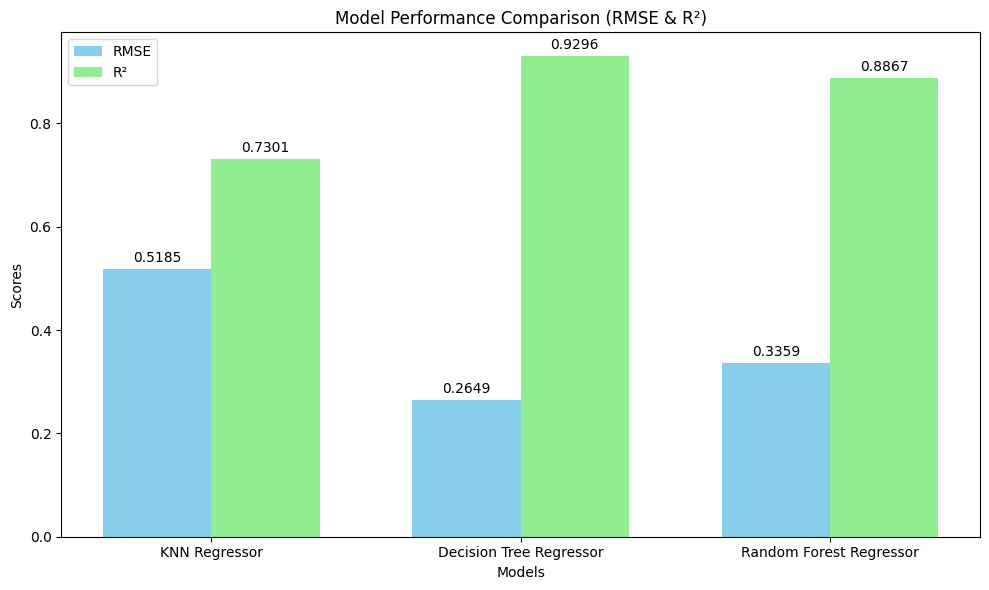

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE and R² scores for the three models
models = ['KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor']
rmse_scores = [knn_rmse, dt_rmse, rf_rmse]
r2_scores = [knn_r2, dt_r2, rf_r2]

# Set positions for the bars on the x-axis
x = np.arange(len(models))

# Set the width of the bars
width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar charts for RMSE and R² scores
bar_rmse = ax.bar(x - width/2, rmse_scores, width, label='RMSE', color='skyblue')
bar_r2 = ax.bar(x + width/2, r2_scores, width, label='R²', color='lightgreen')

# Add text labels on top of each bar
def add_labels(bars, scores):
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        ax.annotate(f'{score:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bar_rmse, rmse_scores)
add_labels(bar_r2, r2_scores)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison (RMSE & R²)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
